In [2]:
import torch
import torchvision.transforms as transforms
from PIL import Image

def apply_style_transfer(model, content_image, output_image_path, device):
    model.eval()

    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
    ])
    content_image = transform(content_image).unsqueeze(0)  # Add batch dimension

    content_image = content_image.to(device)

    with torch.no_grad():
        generated_image = model(content_image)

    generated_image = generated_image.cpu().squeeze().numpy()
    generated_image = (generated_image + 1) / 2.0

    generated_image = (generated_image * 255).astype('uint8')
    Image.fromarray(generated_image.transpose(1, 2, 0)).save(output_image_path)
    
    return Image.fromarray(generated_image.transpose(1, 2, 0))

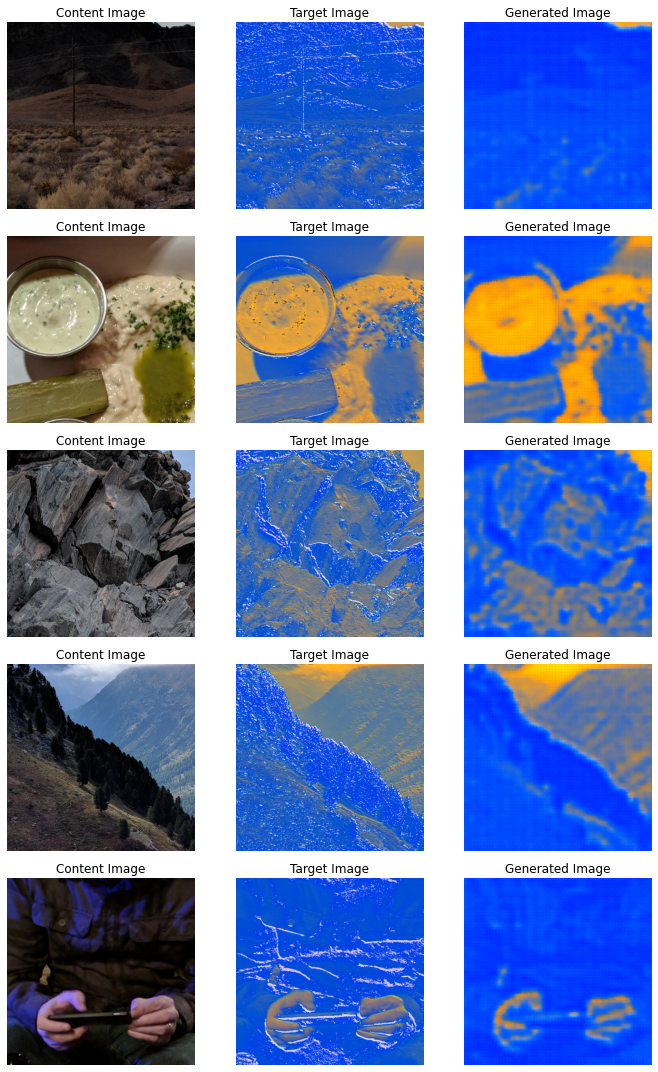

In [8]:
import os
import random

import sys
sys.path.append('../')

from model import StyleTransferUNet
from tools import getDataset
import matplotlib.pyplot as plt

image_directory = '../VD_dataset2/'
output_directory = '../output'
num_samples = 5

dataset = getDataset(image_directory, True)

# Take random samples from the list
random_image_file_paths = random.sample(dataset[-40:], num_samples)

# Generate output image paths
output_image_paths = [os.path.join(output_directory, f'generated_image{i}.jpg') for i in range(1, num_samples+1)]

model = StyleTransferUNet()
model.load_state_dict(torch.load('../trained_model/style_transfer_model.pth'))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


fig, axes = plt.subplots(num_samples, 3, figsize=(10, 15))

for i, (img, target, label) in enumerate(random_image_file_paths):
    content_image = Image.open(img).convert('RGB')
    target_image = Image.open(target).convert('RGB')

    output_image_path = output_image_paths[i]
    generated_image = apply_style_transfer(model, content_image, output_image_path, device)

    # Plot content image
    axes[i][0].imshow(content_image)
    axes[i][0].set_title('Content Image')
    axes[i][0].axis('off')

    # Plot target image
    axes[i][1].imshow(target_image)
    axes[i][1].set_title('Target Image')
    axes[i][1].axis('off')

    # Plot generated image
    axes[i][2].imshow(generated_image)
    axes[i][2].set_title('Generated Image')
    axes[i][2].axis('off')

plt.tight_layout()
plt.show()  
